# Experimentación

## Compilado y Preparación

#### Compilamos el código de C++.

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 10.1.0
-- The CXX compiler identification is GNU 10.1.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/fyulita/.virtualenvs/scienv/bin/python (found version "3.8.3") 
-- Found PythonLibs: /usr/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03
-

#### Importamos las librerías necesarias.

In [2]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pwd
!python --version

/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03/notebooks
Python 3.8.3


#### Importamos los datos de entrenamiento y test.

In [32]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

display(train)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,...,53666.0,NaN,NaN,2015-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10 00:00:00,0.0,0.0,0.0,1.0,1.0,1940000.0
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,...,50003995.0,NaN,NaN,2015-03-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3400000.0
239998,146867,casa sola. javier rojo gomez.,"casa sola, dividida en cuatro departamentos de...",Casa,Javier Rojo Gomez 120,Iztapalapa,Distrito Federal,20.0,4.0,0.0,...,24162.0,19.366651,-99.082246,2014-12-26 00:00:00,1.0,0.0,0.0,1.0,1.0,2890000.0


#### Notemos que las variables numéricas están a partir de la columna 7 "antiguedad". El precio está en la última columna, la 23.

## Caso 1 - Metros Cubiertos vs. Precio

#### Consideremos como caso ajustar el precio en función del tamaño de la casa en metros para 100 casas del conjunto de datos.

In [7]:
# Tomo una muestra de 100 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos).
train_100 = train.dropna().sample(100)

x_data = train_100["metroscubiertos"].values
y_data = train_100["precio"].values

display(train_100[["id", "metroscubiertos", "precio"]])

,id,metroscubiertos,precio
220686,131240,210.0,2950000.0
109076,253174,45.0,330000.0
208816,227101,280.0,6650000.0
26074,123567,58.0,330000.0
150443,176513,120.0,1200000.0
...,...,...,...
120252,243856,140.0,2500000.0
73500,277268,271.0,3300000.0
194175,25826,273.0,1656000.0
49168,119834,60.0,795000.0


count    100.000000
mean     160.580000
std       85.729099
min       45.000000
25%       88.750000
50%      142.000000
75%      221.500000
max      370.000000
Name: metroscubiertos, dtype: float64

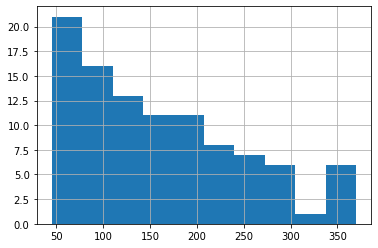

In [26]:
# Veamos un poco de info sobre los metros cubiertos de las viviendas elegidas.
display(train_100["metroscubiertos"].describe())
train_100["metroscubiertos"].hist()

count    1.000000e+02
mean     2.161036e+06
std      1.992183e+06
min      3.300000e+05
25%      8.362500e+05
50%      1.430000e+06
75%      2.705725e+06
max      1.080000e+07
Name: precio, dtype: float64

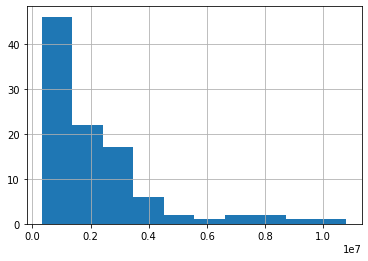

In [30]:
# Veamos un poco de info sobre los precios de las viviendas elegidas.
display(train_100["precio"].describe())
train_100["precio"].hist()

In [8]:
# Ajustamos.
ajuste = metnum.LinearRegression()
ajuste.fit(x_data, y_data)

#### Ya hecho el ajuste hagamos un gráfico de los datos y del ajuste hallado para comprobar que el algoritmo funcionó correctamente.

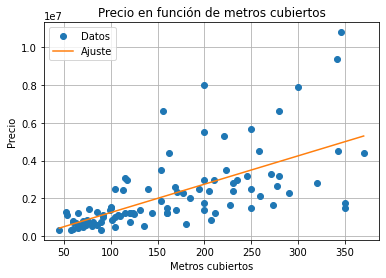

In [19]:
x_graph = np.linspace(np.min(x_data), np.max(x_data), 1000)
y_graph = ajuste.predict(x_graph)

y_graph = y_graph.reshape(y_graph.shape[0])

plt.figure("Precio en función de metros cubiertos")
plt.title("Precio en función de metros cubiertos")
plt.plot(x_data, y_data, "o", label="Datos")
plt.plot(x_graph, y_graph, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel("Metros cubiertos")
plt.ylabel("Precio")
plt.show()

#### Notemos que el ajuste parece ser razonable pero claramente se ve afectado por outliers y no determina muy bien el verdadero precio de las viviendas. Veamos el RMSE y el RMSLE del ajuste.

In [20]:
def RMSE(data, prediction):
    assert len(data) == len(prediction)
    
    N = len(data)
    sum = 0
    for i in range(N):
        sum = sum + (data[i] - prediction[i]) ** 2
    
    return np.sqrt(sum / N)


def RMSLE(data, prediction):
    assert len(data) == len(prediction)
    
    N = len(data)
    sum = 0
    for i in range(N):
        sum = sum + (np.log(data[i] + 1) - np.log(prediction[i] + 1)) ** 2
    
    return np.sqrt(sum / N)

In [21]:
y_prediction = ajuste.predict(x_data)
y_prediction = y_prediction.reshape(y_prediction.shape[0])

rmse = RMSE(y_data, y_prediction)
rmsle = RMSLE(y_data, y_prediction)

print("RMSE =", rmse)
print("RMSLE =", rmsle)

RMSE = 1513426.5970841553
RMSLE = 0.542507771036499


#### Notemos que el RMSE es muchísimo mayor que el RMSLE. Esto es razonable, ya que el RMSE es del orden del precio de las viviendas (de los millones de pesos) debido a los outliers. Sin embargo, el RMSLE no se ve tan afectado por outliers ya que es esencialmente el logaritmo del error relativo del ajuste; no del error absoluto.

## Caso 2 - Latitud y Longitud vs. Precio